In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
X = data["data"][:,2:4].copy()
y = data["target"].copy()
y[y==2] = 1

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [8]:
from sklearn.svm import SVC
svc_clf = SVC(C=1e10,kernel="linear")
svc_clf.fit(X_train, y_train)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
svc_clf.support_vectors_

array([[1.7, 0.5],
       [1.9, 0.2],
       [3. , 1.1]])

In [130]:
inds = svc_clf.support_
sup_vec = svc_clf.support_vectors_
slope = (sup_vec[0,1]-sup_vec[1,1])/(sup_vec[0,0]-sup_vec[1,0])
upperMarginLowerX = X_train[inds[0]][0]-2
upperMarginLowery = X_train[inds[0]][1]-2*slope
upperMarginUpperX = X_train[inds[0]][0]+5
upperMarginUppery = X_train[inds[0]][1]+5*slope

lowerMarginLowerX = X_train[inds[2]][0]-2
lowerMarginLowery = X_train[inds[2]][1]-2*slope
lowerMarginUpperX = X_train[inds[2]][0]+5
lowerMarginUppery = X_train[inds[2]][1]+5*slope

In [208]:
d = X_train[inds[2]][0]-X_train[inds[2]][1]/slope-(X_train[inds[0]][0]-X_train[inds[0]][1]/slope)

In [188]:
middleMarginlowerX = X_train[inds[0]][0]-(X_train[inds[0]][0]+d/2)
middleMarginupperX = X_train[inds[0]][0]+(X_train[inds[0]][0]+d/2)
middleMarginlowerY = X_train[inds[0]][1]-(X_train[inds[0]][0]+d/2)*slope
middleMarginupperY = X_train[inds[0]][1]+(X_train[inds[0]][0]+d/2)*slope

In [198]:
d

2.0399999999999996

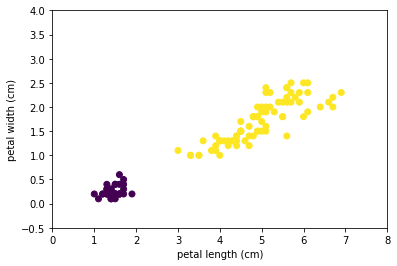

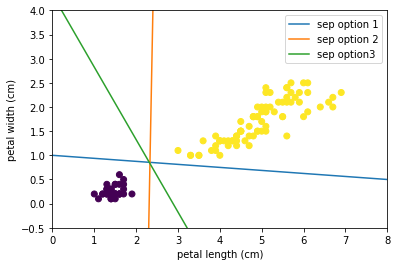

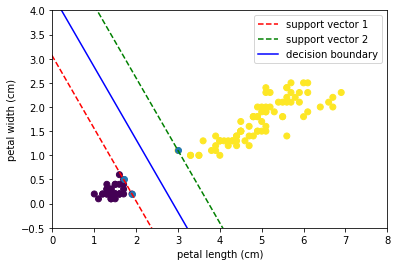

In [244]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.xlim(0,8)
plt.ylim(-0.5,4)
plt.savefig("sepWithoutSVM.png",bbox_inches="tight")
plt.show()

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.plot([0,8],[1,.5],label="sep option 1")
plt.plot([2.3,2.4],[-0.5,4],label="sep option 2")
plt.plot([lowerMarginLowerX-d/2,lowerMarginUpperX-d/2],[lowerMarginLowery,lowerMarginUppery],label="sep option3")
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.xlim(0,8)
plt.ylim(-0.5,4)
plt.legend()
plt.savefig("svmLinSepOptions.png",bbox_inches="tight")
plt.show()


plt.scatter(X_train[:, 0], X_train[:, 1], c = svc_clf.predict(X_train))
plt.scatter(x = svc_clf.support_vectors_[:, 0], y = svc_clf.support_vectors_[:, 1])
plt.plot([upperMarginLowerX,upperMarginUpperX],[upperMarginLowery,upperMarginUppery],ls="--",c="r",
        label = "support vector 1")
plt.plot([lowerMarginLowerX,lowerMarginUpperX],[lowerMarginLowery,lowerMarginUppery],ls="--",c="g",
        label = "support vector 2")
plt.plot([lowerMarginLowerX-d/2,lowerMarginUpperX-d/2],[lowerMarginLowery,lowerMarginUppery],ls="-",c="b",
        label = "decision boundary")
plt.xlim(0,8)
plt.ylim(-0.5,4)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.legend()
plt.savefig("svmLinearSep.png",bbox_inches="tight")
plt.show()

In [75]:
X = data["data"][:,2:4].copy()
y = data["target"].copy()
y[y==2] = 1

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

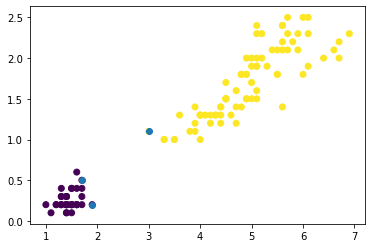

In [76]:
from sklearn.svm import SVC
svc_clf = SVC(C=1e20,kernel="linear")
svc_clf.fit(X_train, y_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)#svc_clf.predict(X_train))
plt.scatter(x = svc_clf.support_vectors_[:, 0], y = svc_clf.support_vectors_[:, 1])
plt.show()

In [263]:
img_pipeline = Pipeline([("mm_scaler", MinMaxScaler())])
# y = dfData[["target","numLoops","hasLoop"]]
# dfData = dfData.drop(["target","numLoops","hasLoop"],axis=1)
# X = dfData.copy()
X_transf = img_pipeline.fit_transform(X_train)

In [77]:
svc_clf.support_vectors_

array([[1.7, 0.5],
       [1.9, 0.2],
       [3. , 1.1]])

In [78]:
svc_clf.dual_coef_

array([[-0.38411627, -0.61549061,  0.99960688]])

In [223]:
y_train

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

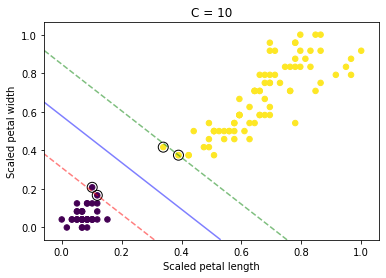

In [278]:
X_train_2 = X_transf#np.append(X_train,[2.4,0.5]).reshape(-1,2)
y_train_2 = y_train#np.append(y_train,[1])

clf = SVC(kernel='linear', C=10)
clf.fit(X_train_2, y_train_2)

plt.scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2, s=30)#, cmap=plt.cm.Paired)
# plt.xlim(0,8)
# plt.ylim(-0.5,4)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors=['r','b','g'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel("Scaled "+data["feature_names"][2][:-5])
plt.ylabel("Scaled "+data["feature_names"][3][:-5])
plt.title("C = 10")
# plt.savefig("hardMarginsFeatureScaled.png",bbox_inches="tight")
plt.show()

In [225]:
inds_2

array([ 57, 120], dtype=int32)

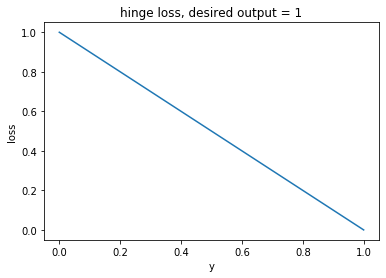

In [274]:
def hinge(val):
    return max(0, 1-val)

x = np.linspace(0,1,10)
y = []
for i in x:
    y.append(hinge(i))
plt.figure()
plt.plot(x,y)
plt.title("hinge loss, desired output = 1")
plt.ylabel("loss")
plt.xlabel("y")
plt.savefig("hingeLoss.png", bbox_inches='tight')
plt.show()

In [308]:
def fitAndPlotPoly(X, y, a = 0, b = 1):
    svc_poly = SVC(kernel="poly", degree = 3, coef0 = 1, C = 1, gamma=10)#coef0 defines
    svc_poly.fit(X, y)
    h = .02
    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc_poly.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, a],X[:, b],c=y)
    plt.xlim(-1.2,2.2)
    plt.ylim(-0.7,1.2)
    plt.title("SVM Poly kernel, degree = 3, coef0 = 1, C = 1, noise = 0.2, gamma = 10")
    plt.savefig("moonsPolySVMGamme10.png",bbox_inches="tight")

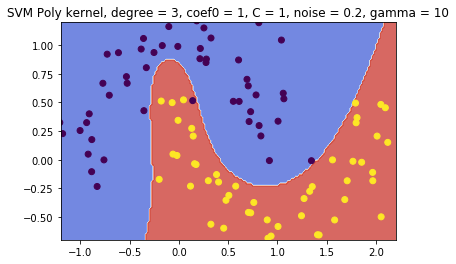

In [309]:
from sklearn.datasets import make_moons

X_moon, y_moon = make_moons(noise=0.2, random_state=0)
fitAndPlotPoly(X_moon, y_moon, a = 0, b = 1)

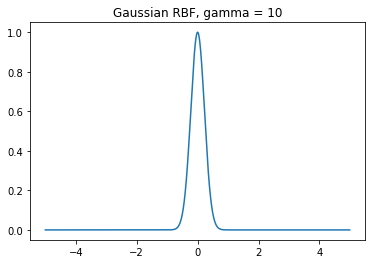

In [312]:
def rbf(x,gamma=1):
    return np.exp(-gamma*x**2)

x = np.arange(-5,5,0.01)
y_rbf = rbf(x, gamma=10)
plt.title("Gaussian RBF, gamma = 10")
plt.plot(x,y_rbf)
plt.savefig("rbfPlotGamma10.png", bbox_inches='tight')
plt.show()

In [335]:
def fitAndPlotRBF(X, y, a = 0, b = 1):
    svc_poly = SVC(kernel="rbf",C = 0.1, gamma=10)
    svc_poly.fit(X, y)
    h = .02
    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc_poly.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, a],X[:, b],c=y)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max )
    plt.title("SVM RBF kernel, C = 0.1, noise = 0.2, gamma = 10")
    plt.savefig("moonsRBFSVMGamme11SSplit.png",bbox_inches="tight")

# fitAndPlotRBF(X_moon, y_moon, a = 0, b = 1)

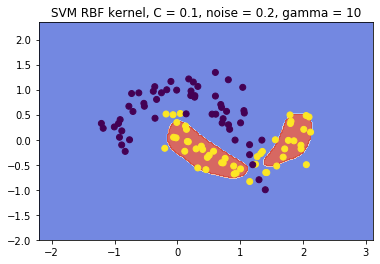

In [338]:
X_moon_new = np.append(X_moon,[[1.15,-0.1],[1.15,-0.3],[1.2,-0.5],[1.3,-0.8],[1.4,-1]]).reshape(-1,2)
y_moon_new = np.append(y_moon,[0,0,0,0,0])
fitAndPlotRBF(X_moon_new, y_moon_new, a = 0, b = 1)

In [401]:
def fitAndPlotSigmoid(X, y, a = 0, b = 1):
    svc_poly = SVC(kernel="sigmoid",C = 1, gamma=10, coef0 = 1)#coef0 defines
    svc_poly.fit(X, y)
    h = .02
    x_min, x_max = X[:, a].min() - 1, X[:, a].max() + 1
    y_min, y_max = X[:, b].min() - 1, X[:, b].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc_poly.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, a],X[:, b],c=y)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max )
    plt.title("SVM Sigmoid kernel, C = 1, noise = 0.2, gamma = 10, coef0 = 1")
    plt.savefig("moonsSigmoidSVM.png",bbox_inches="tight")

# fitAndPlotSigmoid(X_moon, y_moon, a = 0, b = 1)

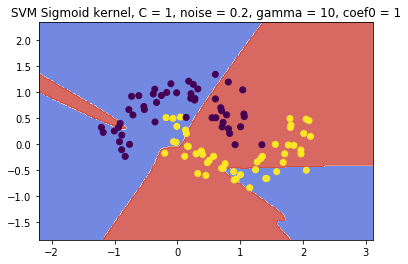

In [402]:
X_moon_new = np.append(X_moon,[[1.15,-0.1],[1.15,-0.3],[1.2,-0.5],[1.3,-0.8],[1.4,-1]]).reshape(-1,2)
y_moon_new = np.append(y_moon,[0,0,0,0,0])
fitAndPlotSigmoid(X_moon, y_moon, a = 0, b = 1)

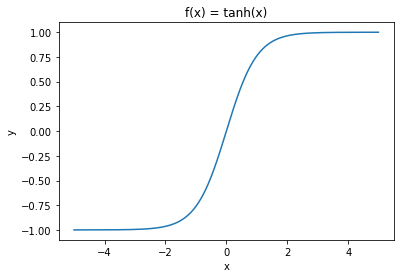

In [392]:
y_tanh = np.tanh(x)
plt.plot(x,y_tanh)
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) = tanh(x)")
plt.savefig("sigmoidFunction.png", bbox_inches='tight')
plt.show()